In [18]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4 as nc4
import geopandas as gpd
import fiona

Populating the interactive namespace from numpy and matplotlib


In [27]:
#Read data
data_path = '/Volumes/d1/mizukami/d1/mizukami/check_mapping/'
polygon = '%s/RouteLink_Cat_2016_11_04.gpkg' % (data_path)
grid = '%s/nldas_conus.shp' % (data_path)

In [40]:
# read geopackange with specific row
poly_file = fiona.open(polygon)
poly_data = gpd.GeoDataFrame.from_features(poly_file[10000:15000])
poly_data.to_file('NHDPlus_selected.shp')

In [29]:
#Read grid shapefile
grid_data = gpd.read_file(grid)

In [30]:
poly_data

,AreaSqKM,ID,Shape_Area,Shape_Length,geometry
0,0.013500,77336,1.218748e-06,0.005159,(POLYGON ((-80.11637218999994 26.1602131170000...
1,10.918800,77310,9.858919e-04,0.211402,(POLYGON ((-80.14586211399995 26.1606219720000...
2,1.607400,79620,1.454749e-04,0.067880,(POLYGON ((-80.06103289199996 26.4487268110000...
3,2.192400,89880,1.964982e-04,0.107336,(POLYGON ((-80.42749049999998 25.2673838110000...
4,0.081000,89574,7.257513e-06,0.014777,(POLYGON ((-80.44773223799996 25.2407901160000...
5,0.022500,90402,2.015914e-06,0.009642,(POLYGON ((-80.49680176899994 25.2383232560000...
6,0.070200,89618,6.288167e-06,0.016027,(POLYGON ((-80.58992431999997 25.2109056470000...
7,0.134100,77928,1.209970e-05,0.032358,(POLYGON ((-80.15178817099996 26.1003238400000...
8,1.796400,90450,1.609368e-04,0.080816,(POLYGON ((-80.62419757899994 25.2297190030000...
9,0.226800,89646,2.031026e-05,0.027158,(POLYGON ((-80.81598290999995 25.1726425520000...


In [31]:
grid_data.head()

,hru_id,lon_cen,lat_cen,nldas_id,geometry
0,1,-124.9375,52.9375,103473,"POLYGON ((-125 53, -124.875 53, -124.875 52.87..."
1,2,-124.9375,52.8125,103009,"POLYGON ((-125 52.875, -124.875 52.875, -124.8..."
2,3,-124.9375,52.6875,102545,"POLYGON ((-125 52.75, -124.875 52.75, -124.875..."
3,4,-124.9375,52.5625,102081,"POLYGON ((-125 52.625, -124.875 52.625, -124.8..."
4,5,-124.9375,52.4375,101617,"POLYGON ((-125 52.5, -124.875 52.5, -124.875 5..."


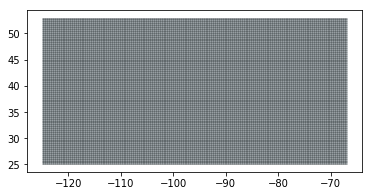

In [37]:

ax1 = poly_data.plot()
grid_data.plot(ax=ax1, alpha=0.1,edgecolor='k',)